# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data_path = 'evaluation_tf_combined.csv'
data = pd.read_csv(data_path)

In [30]:
correct_columns = ['Correct', 'Correct.1', 'Correct.2']
for col in correct_columns:
    data[col] = data[col].apply(lambda x: x if x in [0, 1] else None)

accuracy = {
    'Ollama Fintuned Mistral': data['Correct'].mean() * 100,
    'RAG - Open AI Gpt-4o-mini': data['Correct.1'].mean() * 100,
    'RAG - Mistral-Large-Latest': data['Correct.2'].mean() * 100,
}

accuracy_df = pd.DataFrame(list(accuracy.items()), columns=['Model', 'Accuracy (%)'])
display(accuracy_df)

,Model,Accuracy (%)
0,Ollama Fintuned Mistral,42.222222
1,RAG - Open AI Gpt-4o-mini,84.444444
2,RAG - Mistral-Large-Latest,86.666667


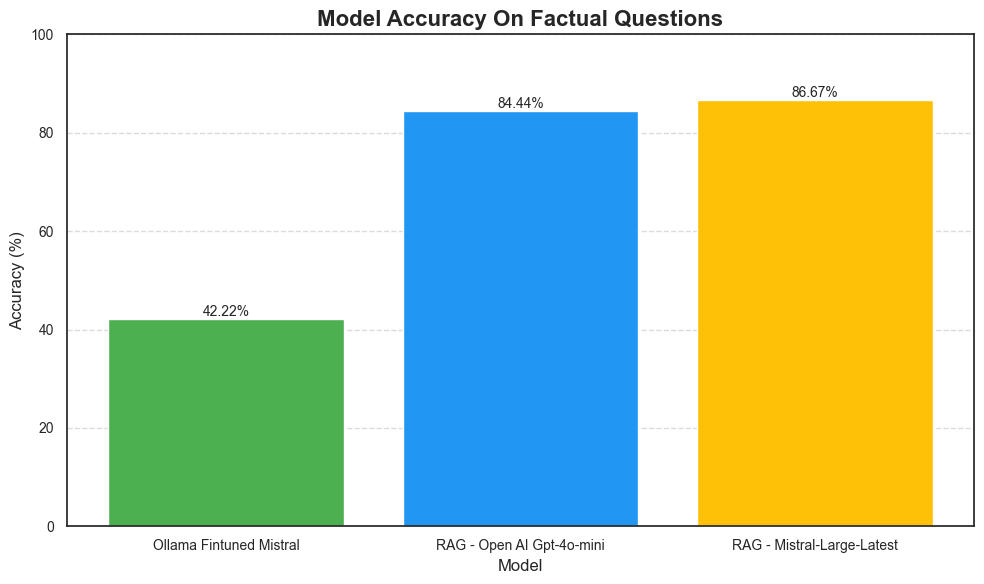

In [78]:
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_df['Model'], accuracy_df['Accuracy (%)'], color=['#4CAF50', '#2196F3', '#FFC107'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Model Accuracy On Factual Questions', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [57]:
true_false_data = data[data['Answer'].str.strip().str.lower().isin(['yes', 'no'])]

other_answers_data = data[~data['Answer'].str.strip().str.lower().isin(['yes', 'no'])]

print(f"Number of True/False questions: {true_false_data.shape[0]}")
print(f"Number of other questions: {other_answers_data.shape[0]}")

true_false_accuracy = {
    'Ollama Fintuned Mistral': true_false_data['Correct'].mean() * 100,
    'RAG - Open AI Gpt-4o-mini': true_false_data['Correct.1'].mean() * 100,
    'RAG - Mistral-Large-Latest': true_false_data['Correct.2'].mean() * 100,
}

other_questions_accuracy = {
    'Ollama Fintuned Mistral': other_answers_data['Correct'].mean() * 100,
    'RAG - Open AI Gpt-4o-mini': other_answers_data['Correct.1'].mean() * 100,
    'RAG - Mistral-Large-Latest': other_answers_data['Correct.2'].mean() * 100,
}

true_false_accuracy_df = pd.DataFrame(list(true_false_accuracy.items()), columns=['Model', 'Accuracy (%)'])
other_questions_accuracy_df = pd.DataFrame(list(other_questions_accuracy.items()), columns=['Model', 'Accuracy (%)'])

display(true_false_accuracy_df)
display(other_questions_accuracy_df)

Number of True/False questions: 29
Number of other questions: 16


,Model,Accuracy (%)
0,Ollama Fintuned Mistral,51.724138
1,RAG - Open AI Gpt-4o-mini,82.758621
2,RAG - Mistral-Large-Latest,82.758621


,Model,Accuracy (%)
0,Ollama Fintuned Mistral,25.00
1,RAG - Open AI Gpt-4o-mini,87.50
2,RAG - Mistral-Large-Latest,93.75


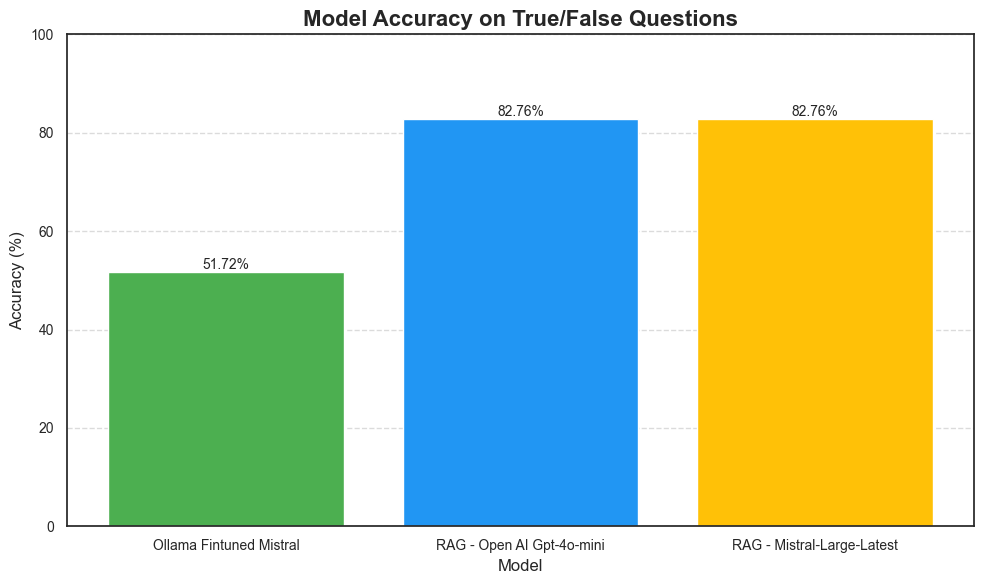

In [80]:
plt.figure(figsize=(10, 6))
bars = plt.bar(true_false_accuracy_df['Model'], true_false_accuracy_df['Accuracy (%)'], color=['#4CAF50', '#2196F3', '#FFC107'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Model Accuracy on True/False Questions', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

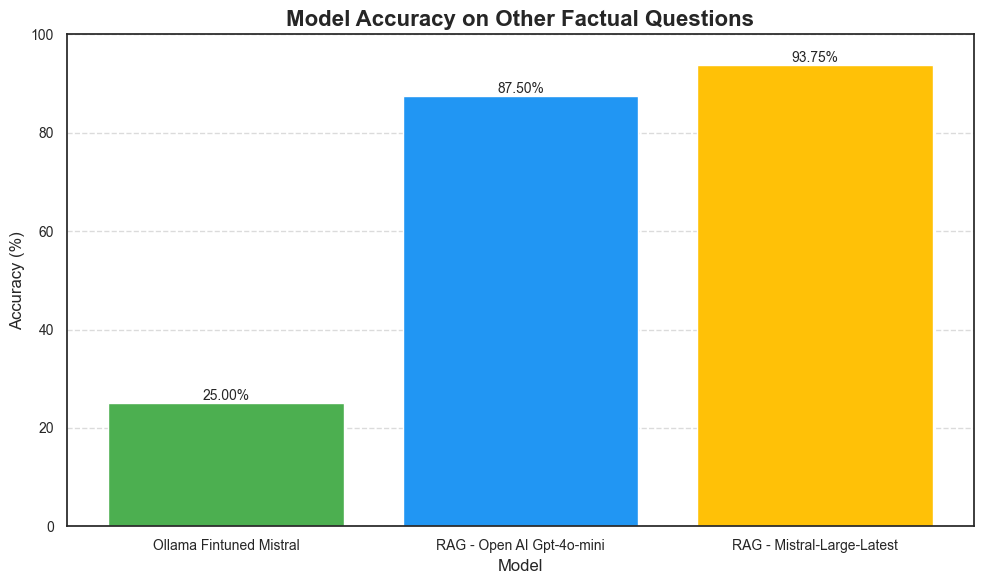

In [79]:
plt.figure(figsize=(10, 6))
bars = plt.bar(other_questions_accuracy_df['Model'], other_questions_accuracy_df['Accuracy (%)'], color=['#4CAF50', '#2196F3', '#FFC107'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.title('Model Accuracy on Other Factual Questions', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [76]:
accuracy = {
    'True/False': {
        'Ollama Fintuned Mistral': true_false_data['Correct'].mean() * 100,
        'RAG - Open AI Gpt-4o-mini': true_false_data['Correct.1'].mean() * 100,
        'RAG - Mistral-Large-Latest': true_false_data['Correct.2'].mean() * 100,
    },
    'Other': {
        'Ollama Fintuned Mistral': other_answers_data['Correct'].mean() * 100,
        'RAG - Open AI Gpt-4o-mini': other_answers_data['Correct.1'].mean() * 100,
        'RAG - Mistral-Large-Latest': other_answers_data['Correct.2'].mean() * 100,
    },
    'Overall': {
        'Ollama Fintuned Mistral': data['Correct'].mean() * 100,
        'RAG - Open AI Gpt-4o-mini': data['Correct.1'].mean() * 100,
        'RAG - Mistral-Large-Latest': data['Correct.2'].mean() * 100,
    },
}

models = list(accuracy['True/False'].keys())
categories = ['True/False', 'Other', 'Overall']
data_for_plot = {model: [accuracy[cat][model] for cat in categories] for model in models}


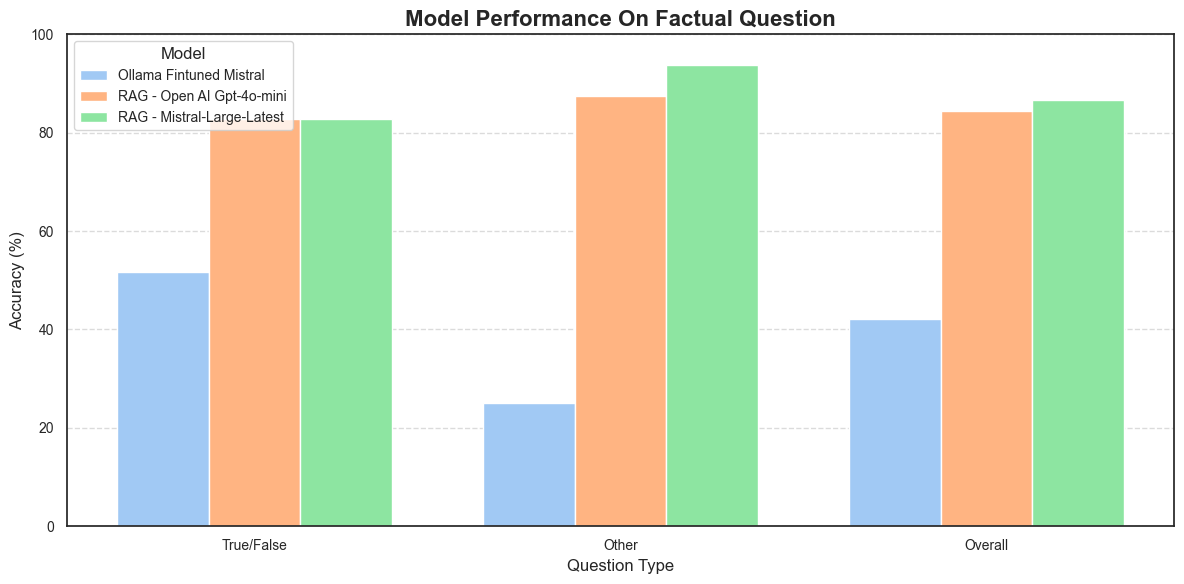

In [90]:
plt.figure(figsize=(12, 6))
bar_width = 0.25
x = range(len(categories))

for i, model in enumerate(models):
    plt.bar(
        [pos + i * bar_width for pos in x],
        data_for_plot[model],
        width=bar_width,
        label=model
    )

# Customize the plot
plt.title('Model Performance On Factual Question', fontsize=16, fontweight='bold')
plt.xlabel('Question Type', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks([pos + bar_width for pos in x], categories, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 100)
plt.legend(title='Model', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [41]:
data_path_rating = 'evaluation_rating_combined.csv'
data_rating = pd.read_csv(data_path_rating)

In [43]:
average_ratings = {
    'Ollama Fintuned Mistral': data_rating['Rating(0-5)'].mean(),
    'RAG - Open AI Gpt-4o-mini': data_rating['Rating(0-5).1'].mean(),
    'RAG - Mistral-Large-Latest': data_rating['Rating(0-5).2'].mean(),
}

average_ratings_df = pd.DataFrame(list(average_ratings.items()), columns=['Model', 'Average Rating'])
display(average_ratings_df)


,Model,Average Rating
0,Ollama Fintuned Mistral,1.928571
1,RAG - Open AI Gpt-4o-mini,4.464286
2,RAG - Mistral-Large-Latest,4.250000


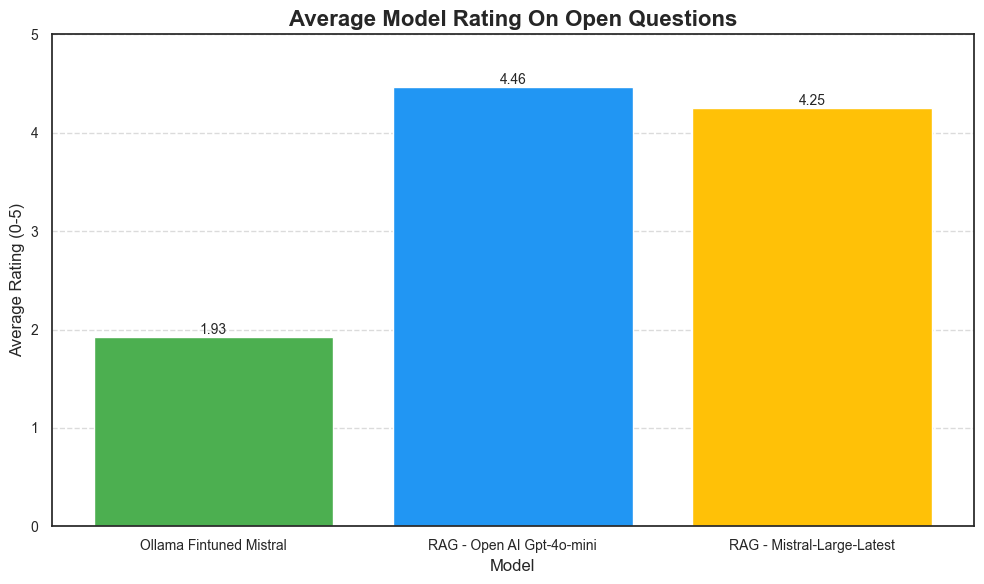

In [48]:
plt.figure(figsize=(10, 6))
bars = plt.bar(average_ratings_df['Model'], average_ratings_df['Average Rating'], color=['#4CAF50', '#2196F3', '#FFC107'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Average Model Rating On Open Questions', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Average Rating (0-5)', fontsize=12)
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [51]:
ratings = {
    'Ollama Fintuned Mistral': data_rating['Rating(0-5)'],
    'RAG - Open AI Gpt-4o-mini': data_rating['Rating(0-5).1'],
    'RAG - Mistral-Large-Latest': data_rating['Rating(0-5).2'],
}

ratings_df = pd.DataFrame(ratings)
display(ratings_df)

,Ollama Fintuned Mistral,RAG - Open AI Gpt-4o-mini,RAG - Mistral-Large-Latest
0,5.0,4.0,5.0
1,3.0,4.0,2.0
2,3.0,1.0,5.0
3,1.0,5.0,5.0
4,1.0,5.0,5.0
5,2.0,5.0,5.0
6,0.0,5.0,5.0
7,0.0,4.0,4.0
8,5.0,5.0,4.0
9,0.0,5.0,5.0


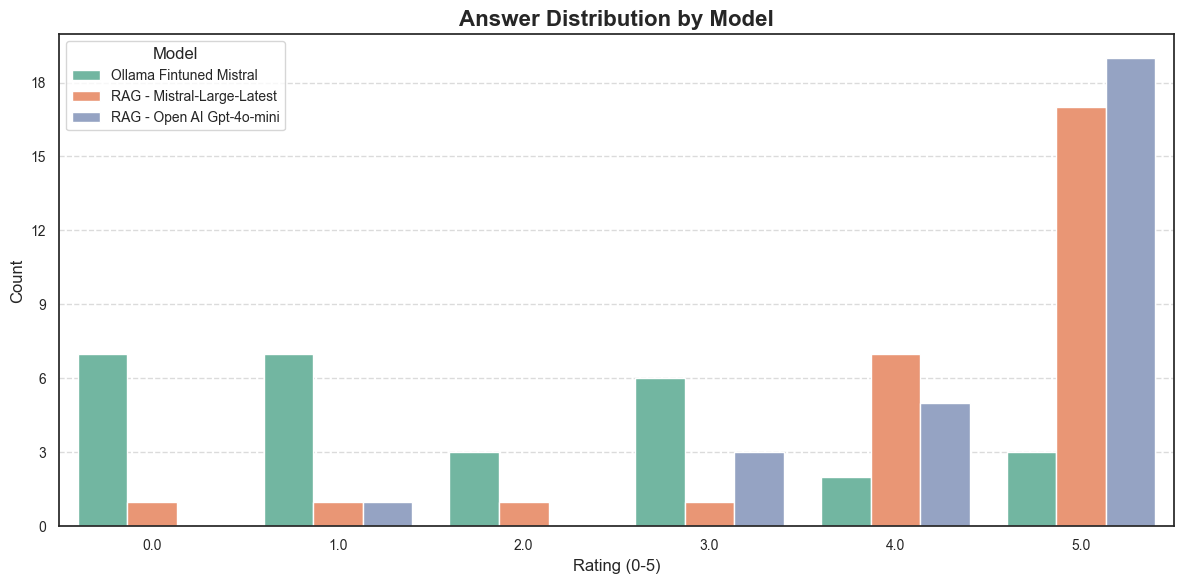

In [89]:
ratings_long = ratings_df.melt(var_name='Model', value_name='Rating')

plt.figure(figsize=(12, 6))
sns.countplot(data=ratings_long, x='Rating', hue='Model', palette='Set2')
plt.title('Answer Distribution by Model', fontsize=16, fontweight='bold')
plt.xlabel('Rating (0-5)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Model', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(3))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()